In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")

In [3]:
#print(airlines.head(10))
#print(airports.head(10))
print(train.head(10))
#print(test.head(10))
#submit_sample.head(10)

   id  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0   0  2015      1    1            4      AS             98      N407AS   
1   1  2015      1    1            4      AA           2336      N3KUAA   
2   2  2015      1    1            4      US            840      N171US   
3   3  2015      1    1            4      AA            258      N3HYAA   
4   4  2015      1    1            4      AS            135      N527AS   
5   5  2015      1    1            4      DL            806      N3730B   
6   6  2015      1    1            4      NK            612      N635NK   
7   7  2015      1    1            4      US           2013      N584UW   
8   8  2015      1    1            4      AA           1112      N3LAAA   
9   9  2015      1    1            4      DL           1173      N826DN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX    

In [4]:
airlines.describe(include='all')
airports.describe(include='all')
train.describe(include='all')

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
count,2.818553e+06,2818553.0,2.818553e+06,2.818553e+06,2.818553e+06,2818553,2.818553e+06,2818553,2818553,2818553,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06
unique,NaN,NaN,NaN,NaN,NaN,14,NaN,4688,322,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,WN,NaN,N477HA,ATL,ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,610684,NaN,2024,183656,183537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.409276e+06,2015.0,3.573126e+00,1.562678e+01,3.938906e+00,NaN,2.192953e+03,NaN,NaN,NaN,1.329533e+03,1.337376e+03,1.613164e+01,1.359705e+03,1.413717e+02,8.191704e+02,1.497113e+03,6.001171e+00
std,8.136463e+05,0.0,1.703931e+00,8.704137e+00,1.986157e+00,NaN,1.774639e+03,NaN,NaN,NaN,4.814211e+02,4.950658e+02,9.226391e+00,4.964894e+02,7.501261e+01,6.033737e+02,5.036512e+02,4.065076e+01
min,0.000000e+00,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,3.100000e+01,1.000000e+00,-8.700000e+01
25%,7.046380e+05,2015.0,2.000000e+00,8.000000e+00,2.000000e+00,NaN,7.330000e+02,NaN,NaN,NaN,9.200000e+02,9.230000e+02,1.100000e+01,9.380000e+02,8.500000e+01,3.730000e+02,1.112000e+03,-1.300000e+01
50%,1.409276e+06,2015.0,4.000000e+00,1.600000e+01,4.000000e+00,NaN,1.673000e+03,NaN,NaN,NaN,1.325000e+03,1.331000e+03,1.400000e+01,1.344000e+03,1.230000e+02,6.490000e+02,1.521000e+03,-4.000000e+00
75%,2.113914e+06,2015.0,5.000000e+00,2.300000e+01,6.000000e+00,NaN,3.354000e+03,NaN,NaN,NaN,1.730000e+03,1.740000e+03,1.900000e+01,1.754000e+03,1.740000e+02,1.061000e+03,1.919000e+03,1.000000e+01


In [5]:
Distance = train['DISTANCE']
Delayed = train['ARRIVAL_DELAY']

In [6]:
train.corr()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
id,1.000000,NaN,0.985528,0.173830,-0.013538,-0.022173,0.011027,0.007774,-0.023178,0.005356,0.009609,0.018006,-0.013015,0.006280
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,0.985528,NaN,1.000000,0.006911,-0.016513,-0.023036,0.005989,0.003218,-0.022875,0.000958,0.009965,0.018283,-0.016714,0.008731
DAY,0.173830,NaN,0.006911,1.000000,0.013750,0.002520,-0.001760,-0.004189,-0.008257,-0.004660,-0.000863,-0.000039,-0.003578,-0.024166
DAY_OF_WEEK,-0.013538,NaN,-0.016513,0.013750,1.000000,0.009782,0.008187,0.005875,-0.019184,0.004324,0.015228,0.016583,0.007960,-0.019053
FLIGHT_NUMBER,-0.022173,NaN,-0.023036,0.002520,0.009782,1.000000,-0.004228,0.001510,0.039481,0.007754,-0.322563,-0.337287,-0.015716,0.017728
SCHEDULED_DEPARTURE,0.011027,NaN,0.005989,-0.001760,0.008187,-0.004228,1.000000,0.964189,-0.008020,0.938907,-0.016488,-0.008196,0.718819,0.103083
DEPARTURE_TIME,0.007774,NaN,0.003218,-0.004189,0.005875,0.001510,0.964189,1.000000,0.000728,0.972747,-0.020876,-0.015219,0.721558,0.164384
TAXI_OUT,-0.023178,NaN,-0.022875,-0.008257,-0.019184,0.039481,-0.008020,0.000728,1.000000,0.026827,0.111012,0.069282,0.011364,0.238806
WHEELS_OFF,0.005356,NaN,0.000958,-0.004660,0.004324,0.007754,0.938907,0.972747,0.026827,1.000000,-0.027731,-0.025878,0.731761,0.160181


In [7]:
train.isnull()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2818549,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2818550,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2818551,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
TrainNAN = train.dropna(thresh = 14)
TrainNAN

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0


In [9]:
## There are no NAN values apparently
TrainNAN = train.dropna()
TrainNAN

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0


In [10]:
Delayed.describe()

count    2.818553e+06
mean     6.001171e+00
std      4.065076e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -4.000000e+00
75%      1.000000e+01
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

(array([2.42565484e-03, 3.50826861e-06, 3.16347562e-07, 5.94767897e-08,
        4.30991230e-09]),
 array([ -87. ,  324.6,  736.2, 1147.8, 1559.4, 1971. ]),
 <BarContainer object of 5 artists>)

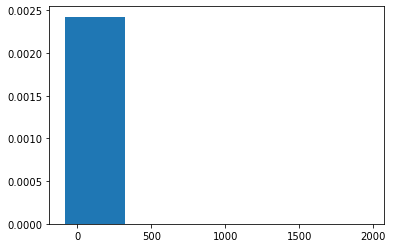

In [11]:
plt.hist(Delayed, density=True, bins=5)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e3bc22c340>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3bc22ca00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3bc21bfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3bc237100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3bc237460>],
 'means': []}

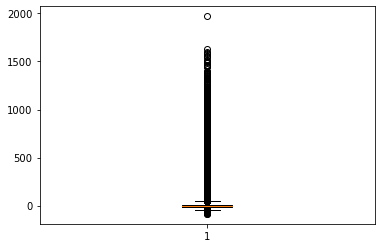

In [12]:
plt.boxplot(Delayed)

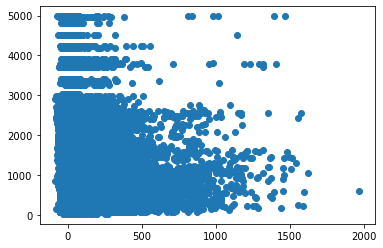

In [13]:
plt.scatter(Delayed, Distance)

In [14]:
## so as you can see in the plots there are a lot of values that lie above the 75 % 
## in the next lines i will try to sort these out if these are from a certain line or place
## I think the value around 2000 is defenitly an outlier. 

In [15]:
TrainOutlier = train[train['ARRIVAL_DELAY'] > 10]
TrainOutlier

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
27,27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,127.0,14.0,141.0,207.0,1487,542,25.0
30,30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,237.0,9.0,246.0,204.0,1440,549,43.0
34,34,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,145.0,16.0,201.0,370.0,2762,555,15.0
38,38,2015,1,1,4,B6,304,N607JB,SJU,JFK,155,153.0,12.0,205.0,235.0,1598,450,11.0
48,48,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,304.0,25.0,329.0,173.0,1129,500,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818542,2818542,2015,6,30,2,B6,1503,N623JB,JFK,SJU,2359,52.0,23.0,115.0,227.0,1598,346,54.0
2818544,2818544,2015,6,30,2,US,550,N576UW,PHX,BOS,2359,8.0,21.0,29.0,294.0,2300,753,60.0
2818545,2818545,2015,6,30,2,US,1720,N676AW,PHX,MSP,2359,6.0,16.0,22.0,177.0,1276,456,17.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0


In [16]:
TrainOutlier.sort_values(['ARRIVAL_DELAY'])

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
2547325,2547325,2015,6,14,7,WN,664,N909WN,PHX,CLE,1340,1404.0,8.0,1412.0,230.0,1737,2030,11.0
224206,224206,2015,1,15,4,WN,2875,N732SW,LAS,MCI,1955,2015.0,11.0,2026.0,160.0,1139,35,11.0
2697030,2697030,2015,6,23,2,AA,327,N3DLAA,DCA,DFW,1533,1531.0,12.0,1543.0,199.0,1192,1752,11.0
1939377,1939377,2015,5,7,4,US,1886,N815AW,BNA,CLT,1250,1246.0,22.0,1308.0,80.0,328,1510,11.0
1036430,1036430,2015,3,12,4,VX,340,N640VA,SFO,FLL,820,820.0,12.0,832.0,320.0,2583,1640,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911947,911947,2015,3,4,3,AA,270,N5DJAA,HNL,LAX,828,1057.0,23.0,1120.0,327.0,2556,1555,1576.0
258405,258405,2015,1,18,7,AA,224,N5DGAA,LAS,LAX,1130,1414.0,16.0,1430.0,76.0,236,1246,1593.0
1232474,1232474,2015,3,24,2,AA,1279,N559AA,OMA,DFW,1103,1352.0,6.0,1358.0,112.0,583,1255,1598.0
853639,853639,2015,2,28,6,AA,1312,N028AA,STL,MIA,620,847.0,71.0,958.0,168.0,1068,1008,1627.0


In [17]:
TrainOutlier.describe()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
count,6.767070e+05,676707.0,676707.000000,676707.000000,676707.000000,676707.000000,676707.000000,676707.000000,676707.000000,676707.000000,676707.000000,676707.000000,676707.000000,676707.000000
mean,1.395698e+06,2015.0,3.553262,15.170060,3.892673,2219.550308,1450.192500,1501.800784,20.555172,1525.918798,142.456564,828.196519,1609.972869,52.039095
std,8.523400e+05,0.0,1.753827,8.696993,2.000023,1785.833641,457.438236,487.511704,14.472807,492.418445,75.190458,603.797946,501.342204,61.387022
min,2.700000e+01,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,31.000000,1.000000,11.000000
25%,6.909405e+05,2015.0,2.000000,8.000000,2.000000,742.000000,1104.000000,1135.000000,12.000000,1151.000000,86.000000,374.000000,1250.000000,18.000000
50%,1.359834e+06,2015.0,4.000000,15.000000,4.000000,1678.000000,1510.000000,1546.000000,16.000000,1602.000000,125.000000,671.000000,1702.000000,31.000000
75%,2.171118e+06,2015.0,5.000000,23.000000,5.000000,3399.000000,1825.000000,1910.000000,24.000000,1927.000000,175.000000,1069.000000,2020.000000,62.000000
max,2.818550e+06,2015.0,6.000000,31.000000,7.000000,9320.000000,2359.000000,2400.000000,225.000000,2400.000000,718.000000,4983.000000,2400.000000,1971.000000


In [18]:
TrainOutlier[TrainOutlier['ARRIVAL_DELAY']>62]

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
50,50,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,535.0,9.0,544.0,185.0,1189,605,85.0
53,53,2015,1,1,4,B6,2276,N646JB,SJU,BDL,438,550.0,15.0,605.0,241.0,1666,739,89.0
67,67,2015,1,1,4,AA,1057,N3ASAA,DFW,MIA,515,703.0,15.0,718.0,161.0,1121,856,102.0
82,82,2015,1,1,4,AA,328,N4XKAA,DEN,DFW,530,623.0,32.0,655.0,125.0,641,835,66.0
97,97,2015,1,1,4,UA,1577,N69813,SMF,DEN,538,634.0,26.0,700.0,142.0,909,900,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818508,2818508,2015,6,30,2,B6,839,N588JB,JFK,BQN,2349,119.0,29.0,148.0,225.0,1576,334,96.0
2818534,2818534,2015,6,30,2,AA,2342,N3HNAA,DEN,MIA,2359,117.0,17.0,134.0,231.0,1709,550,67.0
2818540,2818540,2015,6,30,2,B6,688,N821JB,LAX,BOS,2359,2357.0,43.0,40.0,330.0,2611,829,74.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0


In [19]:

zvalue = np.abs(stats.zscore(Delayed))
print(zvalue)

[0.68882297 0.36902568 0.0246286  ... 2.48455011 0.07377056 0.34442589]


In [20]:
# =NORM.INV(0,9995;0;1)
print(np.where(zvalue > 3.290527))
len(np.where(zvalue > 3.290527))

(array([    157,     335,     439, ..., 2818361, 2818412, 2818418],
      dtype=int64),)


1

In [21]:
TrainNew = train.drop(Delayed.argmax(), axis =0)

In [22]:
TrainNew.describe()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
count,2.818552e+06,2818552.0,2.818552e+06,2.818552e+06,2.818552e+06,2.818552e+06,2.818552e+06,2.818552e+06,2.818552e+06,2.818552e+06,2.818552e+06,2.818552e+06,2.818552e+06,2.818552e+06
mean,1.409276e+06,2015.0,3.573127e+00,1.562678e+01,3.938906e+00,2.192953e+03,1.329534e+03,1.337376e+03,1.613164e+01,1.359705e+03,1.413717e+02,8.191704e+02,1.497113e+03,6.000474e+00
std,8.136462e+05,0.0,1.703931e+00,8.704138e+00,1.986157e+00,1.774639e+03,4.814210e+02,4.950658e+02,9.226393e+00,4.964894e+02,7.501262e+01,6.033737e+02,5.036511e+02,4.063391e+01
min,0.000000e+00,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,3.100000e+01,1.000000e+00,-8.700000e+01
25%,7.046388e+05,2015.0,2.000000e+00,8.000000e+00,2.000000e+00,7.330000e+02,9.200000e+02,9.230000e+02,1.100000e+01,9.380000e+02,8.500000e+01,3.730000e+02,1.112000e+03,-1.300000e+01
50%,1.409276e+06,2015.0,4.000000e+00,1.600000e+01,4.000000e+00,1.673000e+03,1.325000e+03,1.331000e+03,1.400000e+01,1.344000e+03,1.230000e+02,6.490000e+02,1.521000e+03,-4.000000e+00
75%,2.113914e+06,2015.0,5.000000e+00,2.300000e+01,6.000000e+00,3.354000e+03,1.730000e+03,1.740000e+03,1.900000e+01,1.754000e+03,1.740000e+02,1.061000e+03,1.919000e+03,1.000000e+01
max,2.818552e+06,2015.0,6.000000e+00,3.100000e+01,7.000000e+00,9.320000e+03,2.359000e+03,2.400000e+03,2.250000e+02,2.400000e+03,7.180000e+02,4.983000e+03,2.400000e+03,1.627000e+03


In [23]:
DelayedNew = TrainNew['ARRIVAL_DELAY']

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3bd43d160>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3bd43d820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3bd42fdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3bd43dee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3bd448280>],
 'means': []}

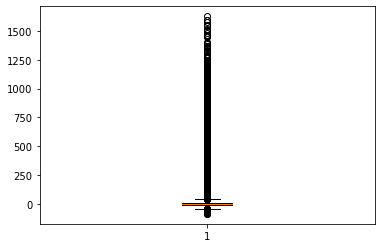

In [24]:
plt.boxplot(DelayedNew)